# Assignment


In [75]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

In [76]:
df = pd.read_csv('/Users/sonikakhanna/Library/CloudStorage/OneDrive-BMLMUNJALUNIVERSITY/BostonHousing - BostonHousing.csv')

In [77]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [78]:
df.shape

(506, 14)

# About the dataset

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

# Question 
As always, we start off with EDA.

- Give me some insights, the better they are, the better your grade looks !!
- Then we move on to the modelling part

Using all of these variables, try to fit/train a linear regression model that predicts the price of the house. 

The ```MEDV``` is the price columns, it is in 1000's of $.

At the end, these are the things i am looking for:-
- Your model train and test RSME
- A python function that takes these values(training row for eg.) as input and predicts a price. 


That's all 

![](https://media.tenor.com/HyDkalWyz7YAAAAd/all-the-best-best-of-luck.gif)


In [66]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [67]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [69]:
df.isnull().sum()/len(df) * 100

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

<Axes: >

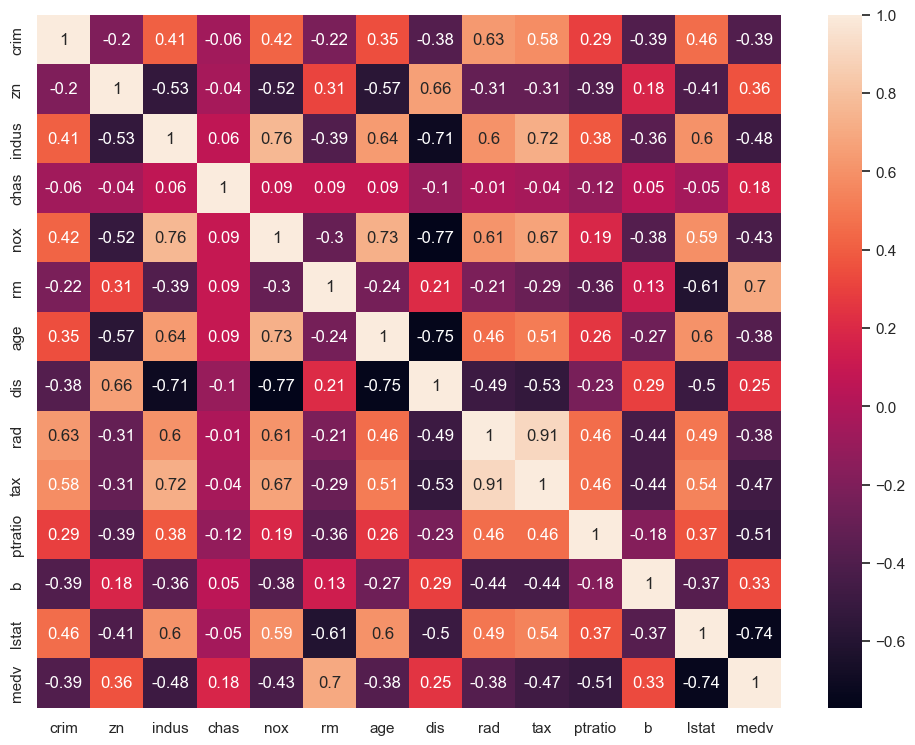

In [141]:
correlationMatrix = df.corr().round(2)
 
sns.heatmap(data=correlationMatrix, annot=True)

In [142]:
The correlation matrix shows that RM has a high positive correlation (0.7) with Price,
whereas LSTAT has a strong negative correlation with Price (-0.74).

SyntaxError: invalid syntax (3787870542.py, line 1)

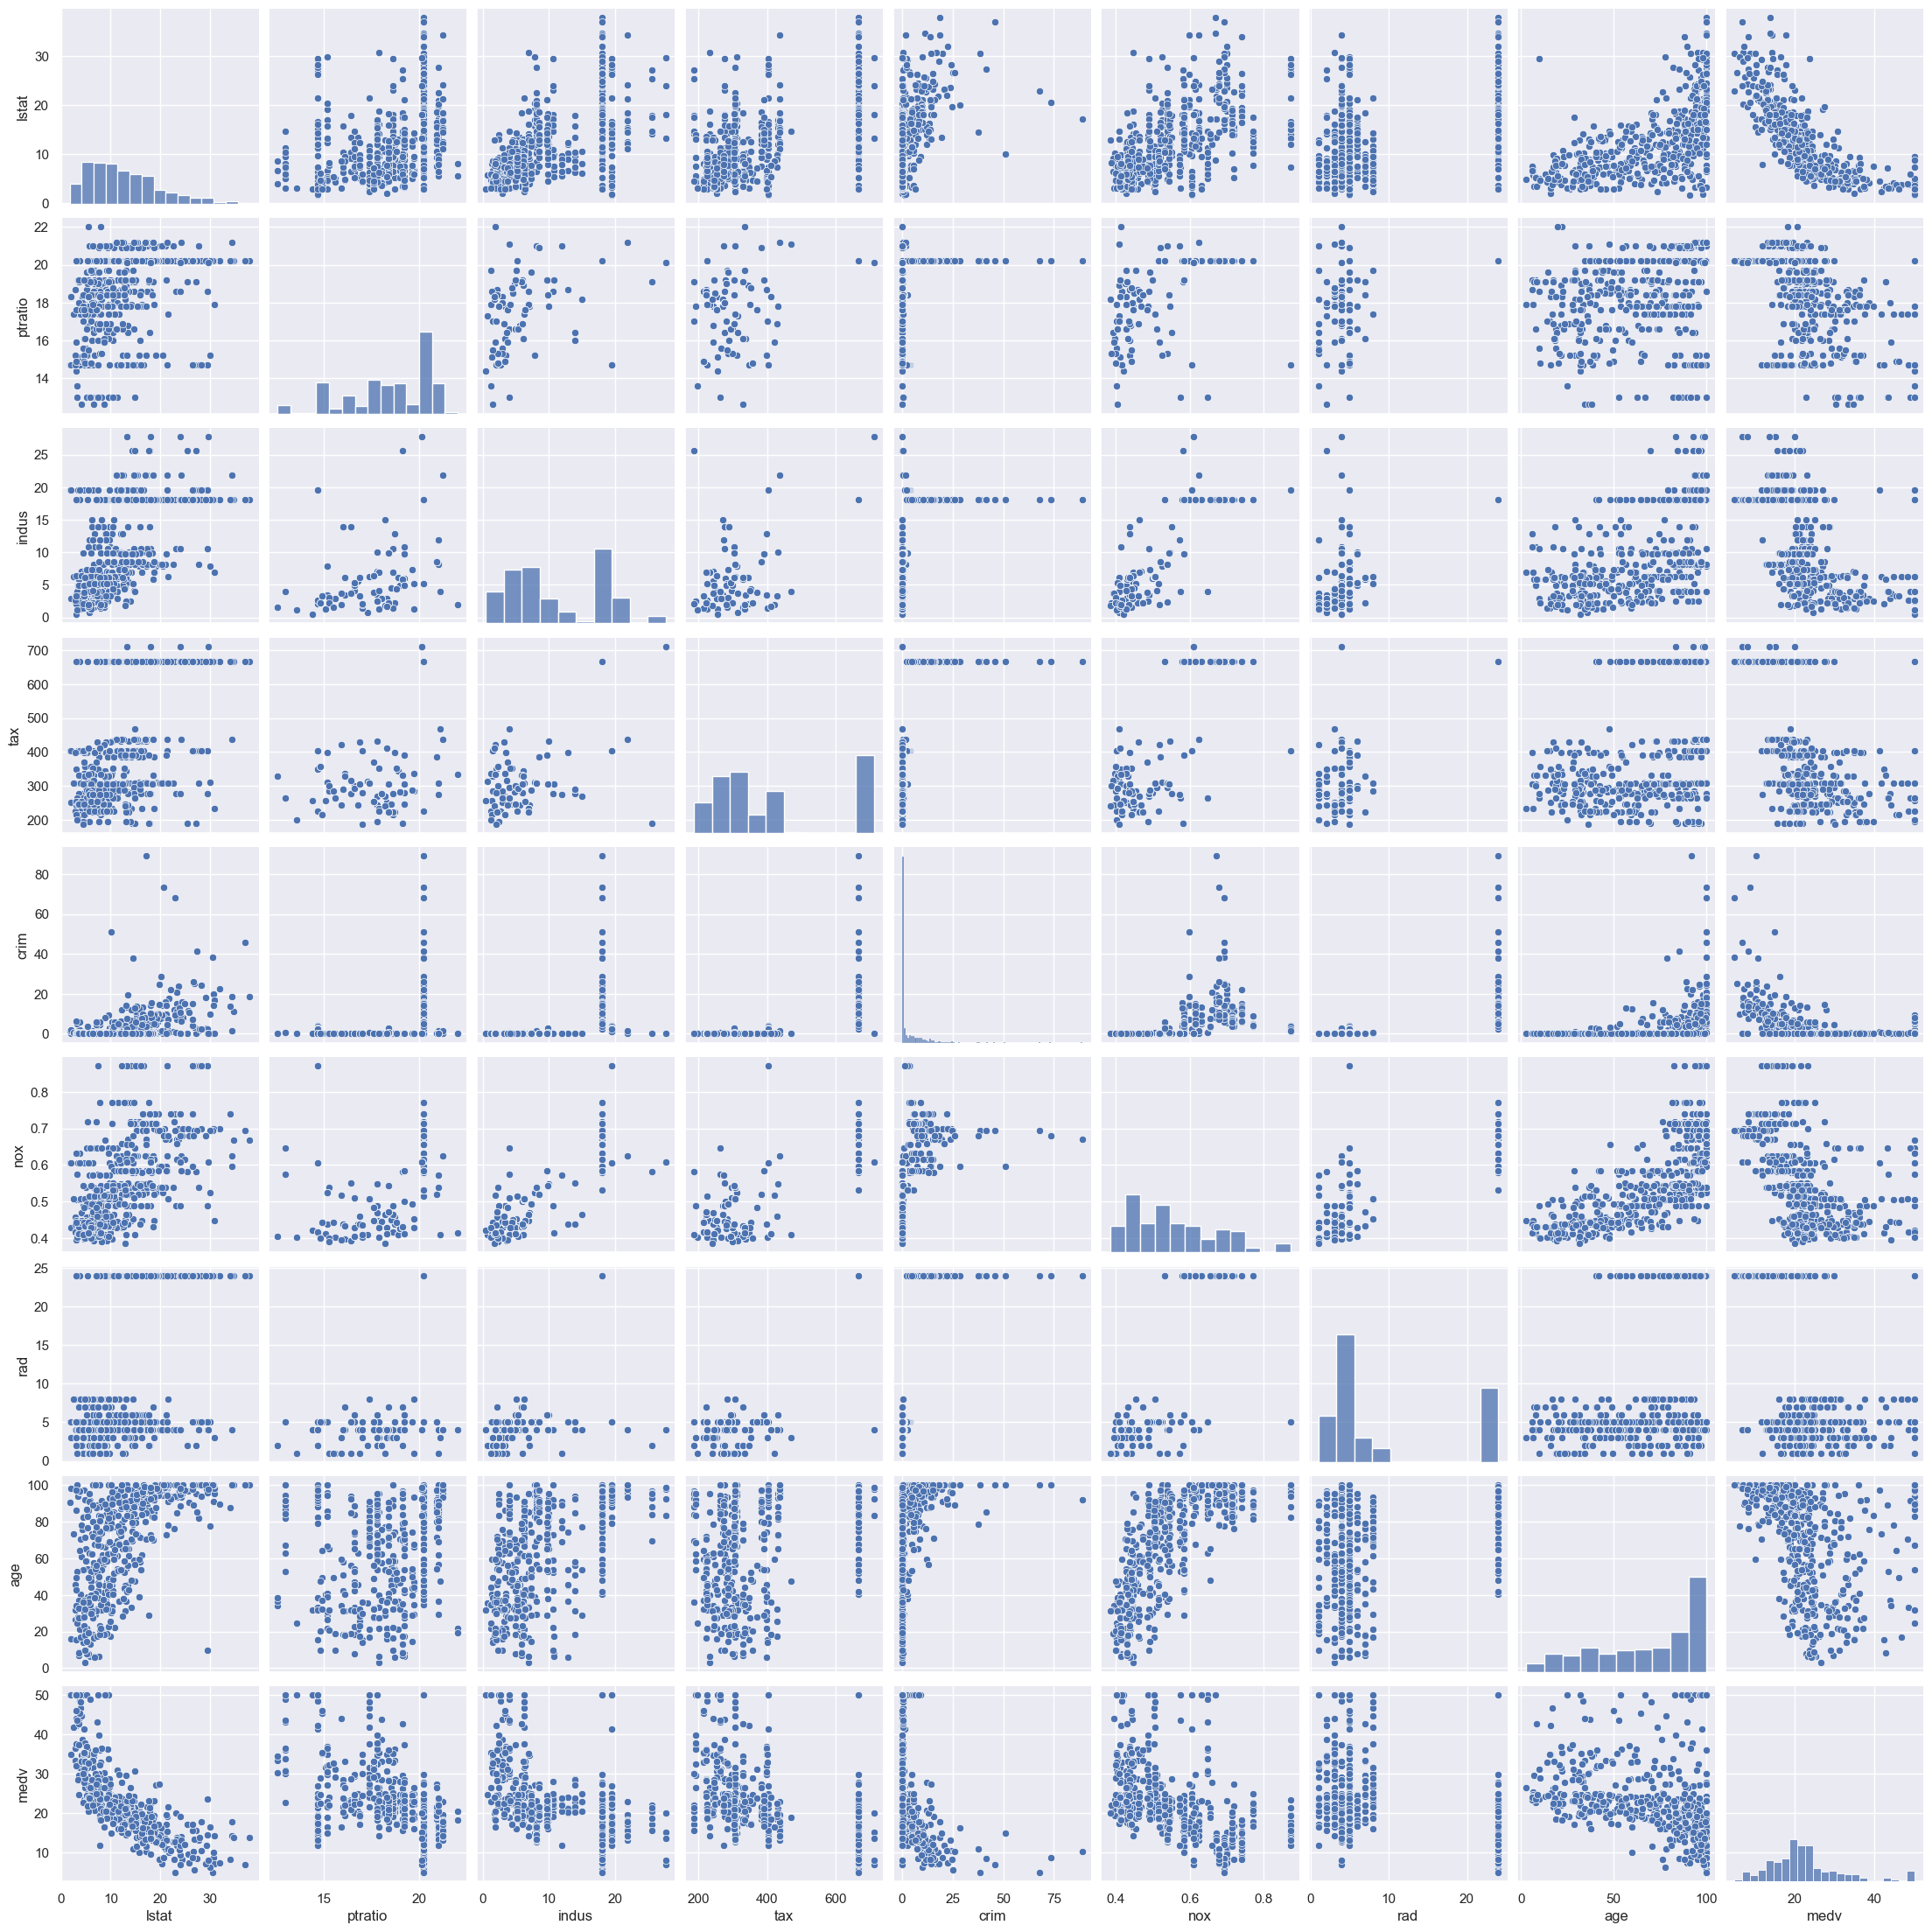

In [96]:
sns.pairplot(df, vars = ['lstat', 'ptratio', 'indus', 'tax', 'crim', 'nox', 'rad', 'age', 'medv'])

In [ ]:
Zero Correlation. When x and y are completely independent

Positive Correlation. 

When x and y go together to the right more independent.

<Axes: xlabel='rm', ylabel='medv'>

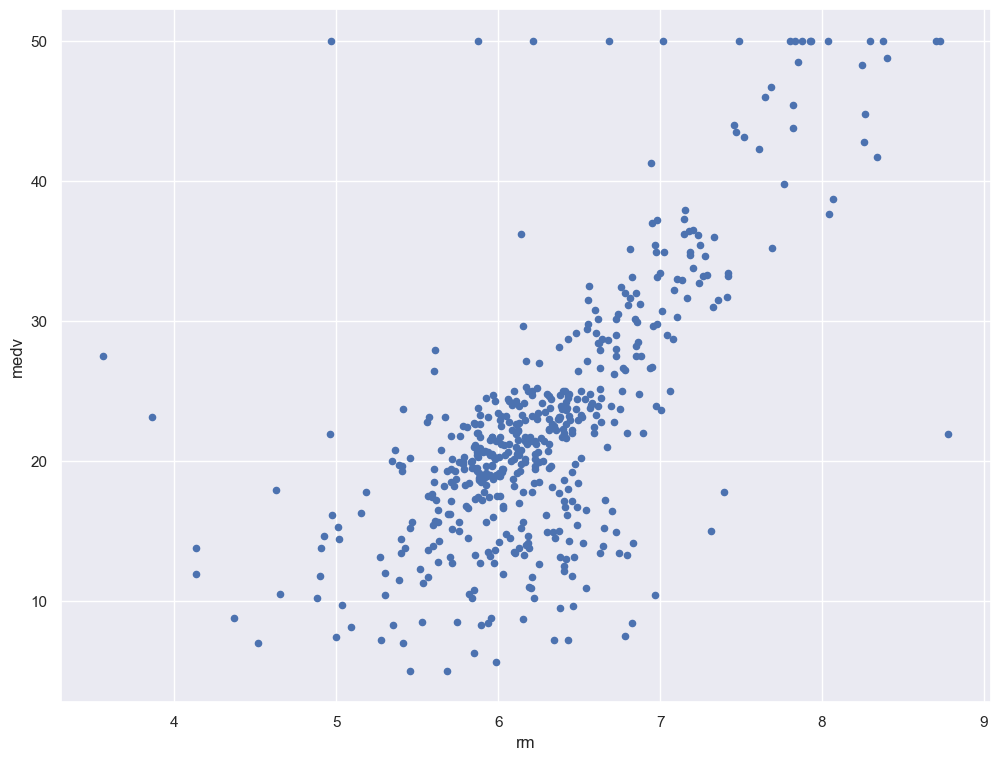

In [143]:
df.plot.scatter('rm', 'medv')

In [ ]:
In this plot its clearly to see a linear pattern. 
Whether more average number of rooms per dwelling, more expensive the median value is

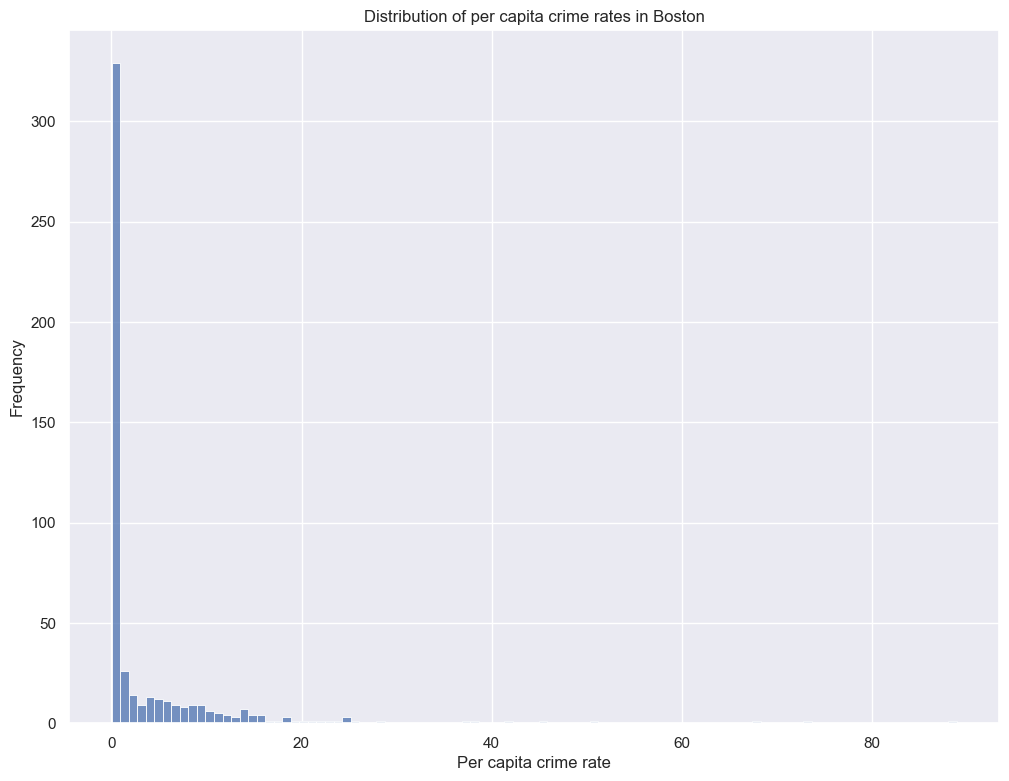

In [117]:
sns.histplot(df['crim'], kde=False)
plt.xlabel('Per capita crime rate')
plt.ylabel('Frequency')
plt.title('Distribution of per capita crime rates in Boston')
plt.show()

In [ ]:
the highest crime rate is above 300 

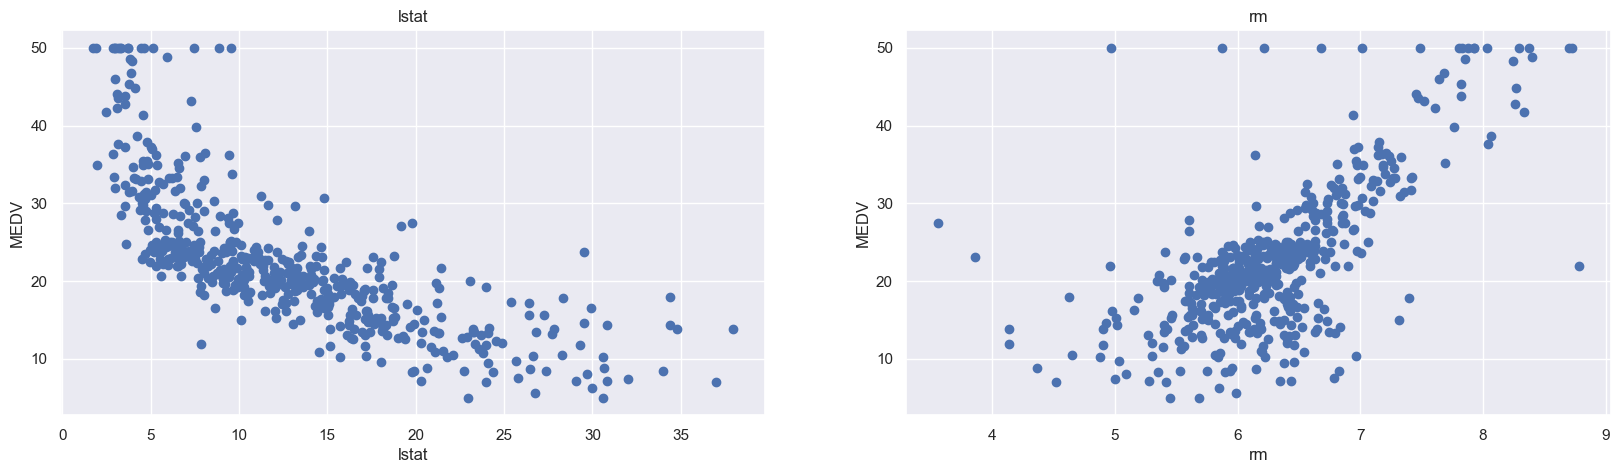

In [123]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = df['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [ ]:
The prices increase as the value of RM increases linearly. 
There are few outliers and the data seems to be capped at 50.

In [129]:
X = df.drop('medv', axis= 1)
y = df['medv']

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [131]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

404
102
404
102


In [139]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

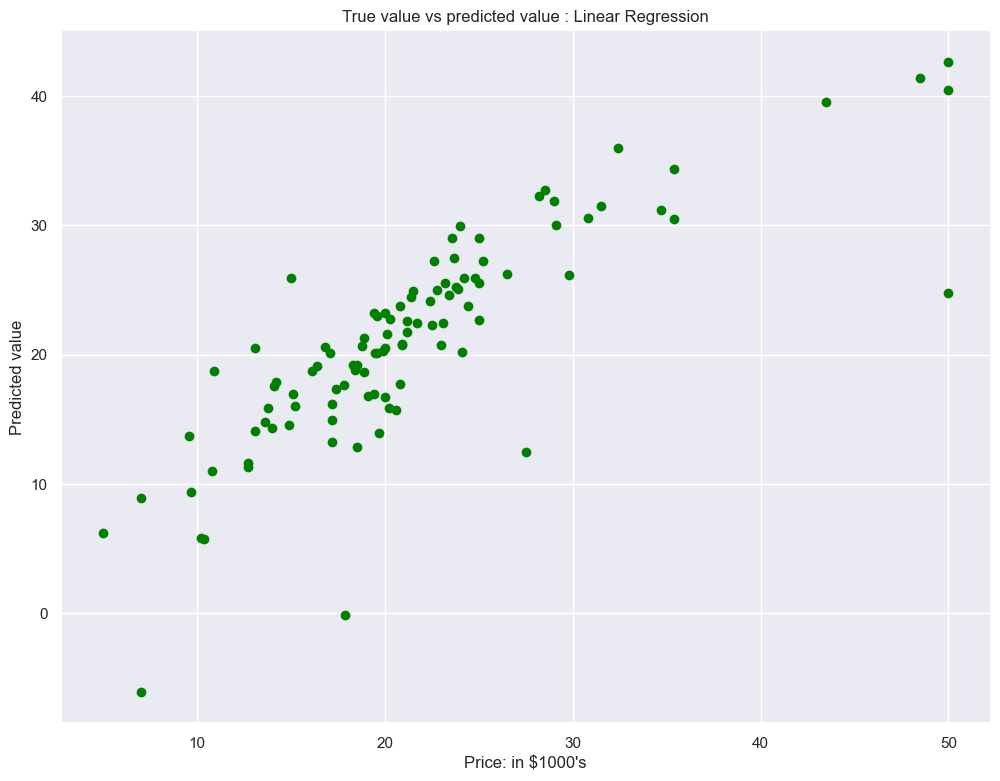

In [140]:
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [ ]:
Results of Linear Regression i.e. Mean Squared Error and Mean Absolute Error

/var/folders/cf/6twhyzx56xj6q56wvg1n5qwm0000gn/T/ipykernel_81553/497840695.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['medv'], bins=30)


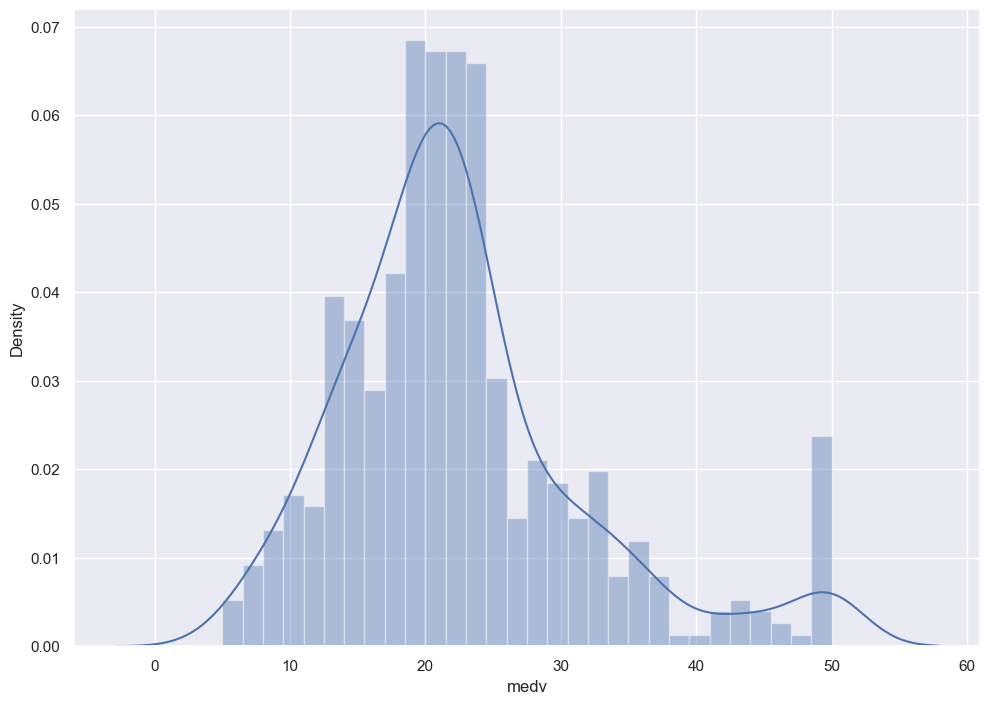

In [144]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['medv'], bins=30)
plt.show()

In [ ]:
We see that the values of MEDV are distributed normally with few outliers.



# training a model 

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
 
 

In [109]:
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat']]
y = df['medv']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [111]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [112]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

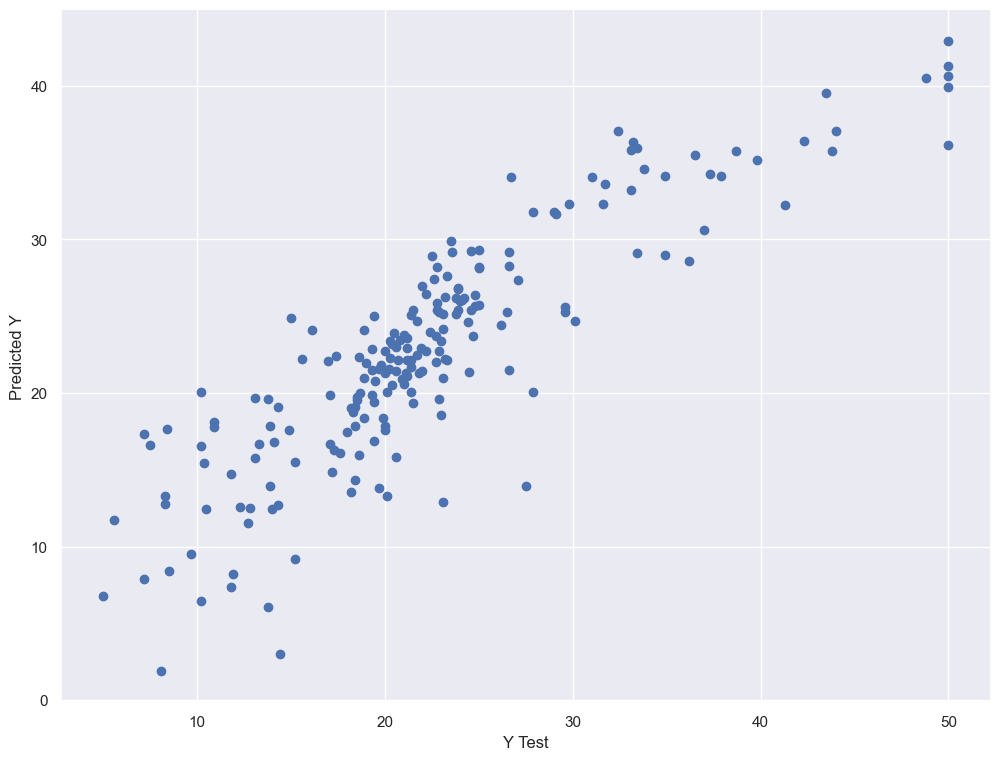

In [113]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [114]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 3.344781864920292
MSE: 18.897050512093667
RMSE: 4.347073787284231


/var/folders/cf/6twhyzx56xj6q56wvg1n5qwm0000gn/T/ipykernel_81553/1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


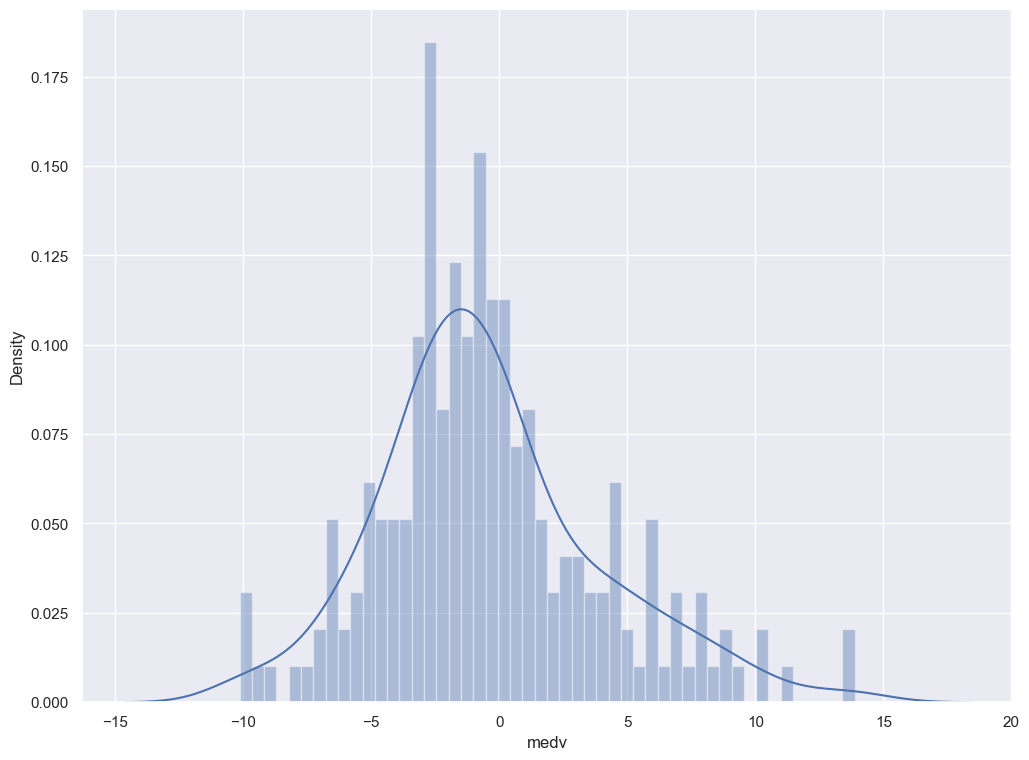

In [115]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
As more normal distribution, better it is.

In [116]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
crim,-0.089380
zn,0.033287
indus,-0.011183
chas,3.390769
nox,-20.351243
rm,3.786066
age,-0.014984
dis,-1.600489
rad,0.390527
tax,-0.016735


In [ ]:
for one unit that nox increase, the house value decrease 'nox'*1000 (Negative correlation) money unit.
for one unit that rm increase, the house value increase 'rm'*1000 (Positive correlation) money unit.